In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
X_train.shape

(60000, 28, 28)

##### Reshape des données à fais d'avoir (60000, 784) et non (60000, 28, 28)

In [21]:
image_size = X_train.shape[1]
input_size = image_size * image_size
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 256
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 256

In [22]:
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [23]:
batch_size = 128
hidden_units = 256
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size, activation=tf.nn.sigmoid))
model.add(Dense(hidden_units, activation=tf.nn.sigmoid))
model.add(Dense(num_labels, activation=tf.nn.softmax))

/Users/clementinemirande/Desktop/M1/M1DENG/S2/BigData/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=batch_size, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6793 - loss: 1.1673 - val_accuracy: 0.9232 - val_loss: 0.2724
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9205 - loss: 0.2708 - val_accuracy: 0.9377 - val_loss: 0.2155
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9408 - loss: 0.2014 - val_accuracy: 0.9521 - val_loss: 0.1721
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9534 - loss: 0.1581 - val_accuracy: 0.9572 - val_loss: 0.1475
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9632 - loss: 0.1268 - val_accuracy: 0.9632 - val_loss: 0.1286
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9679 - loss: 0.1055 - val_accuracy: 0.9652 - val_loss: 0.1174
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0861 - val_accuracy: 0.9667 - val_loss: 0.1114
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9782 - loss: 0.0724 - val_accuracy: 0.

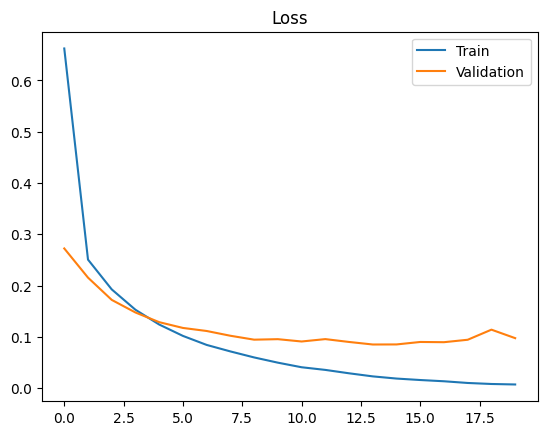

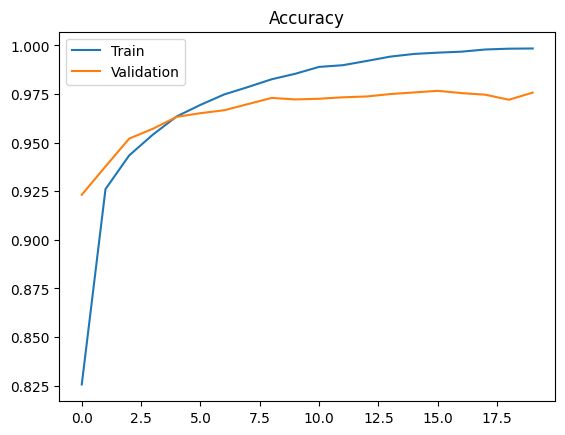

In [25]:
loss_curve = history.history['loss']
loss_val_curve = history.history['val_loss']
accuracy_curve = history.history['accuracy']
accuracy_val_curve = history.history['val_accuracy']
plt.plot(loss_curve, label='Train')
plt.plot(loss_val_curve, label='Validation')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()
plt.plot(accuracy_curve, label='Train')
plt.plot(accuracy_val_curve, label='Validation')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.show()

##### Nombre d'erreur pour chaque nbr du dataset

In [32]:
y_pred = model.predict(X_test)
y_pred_value = np.array(y_pred).argmax(axis=1)
y_test_val = np.array(y_test).argmax(axis=1)
df = pd.DataFrame(y_pred_value, columns=['y_pred'])
df['y_test'] = pd.DataFrame(y_test_val, columns=['y_test'])
total = 0
for i in range(10):
    val = df[(df['y_pred'] != i) & (df['y_test'] == i)].shape
    print(f'range {i} : {val[0]}')
    total += val[0]
print(total)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
range 0 : 12
range 1 : 5
range 2 : 12
range 3 : 17
range 4 : 23
range 5 : 20
range 6 : 19
range 7 : 39
range 8 : 37
range 9 : 27
211


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step


<Axes: >

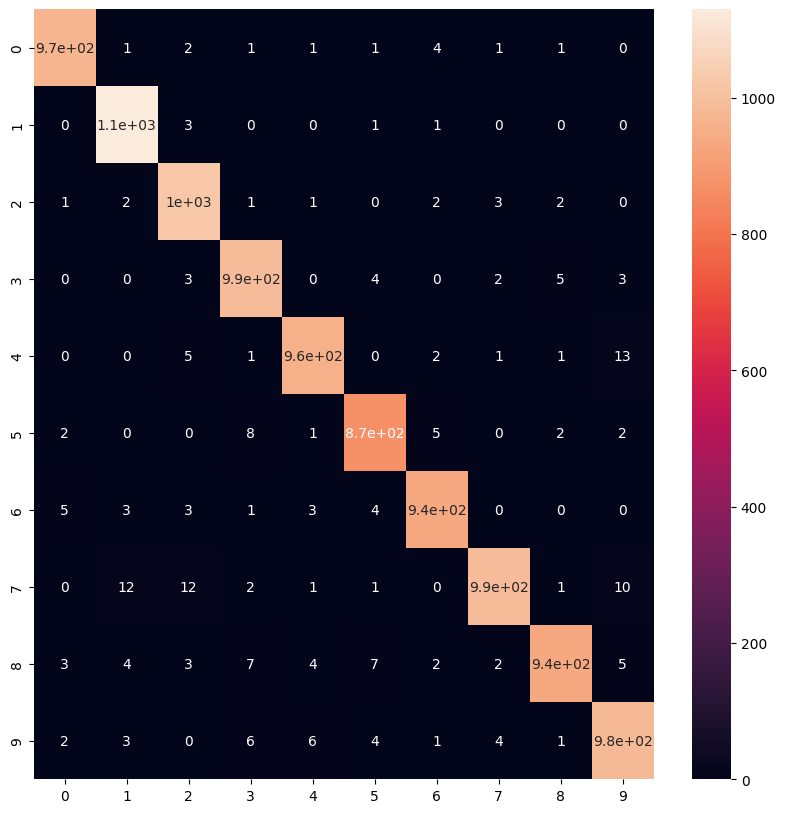

In [33]:
y_pred = model.predict(X_test)
y_pred_value = np.array(y_pred).argmax(axis=1)
y_test_val = np.array(y_test).argmax(axis=1)
plt.figure(figsize=(10, 10))
sns.heatmap(confusion_matrix(y_test_val, y_pred_value), annot=True)


In [34]:
df = pd.DataFrame(y_pred_value, columns=['y_pred'])
df['y_test'] = pd.DataFrame(y_test_val, columns=['y_test'])
ind = df[(df['y_pred'] == 9) & (df['y_test'] == 4)].index

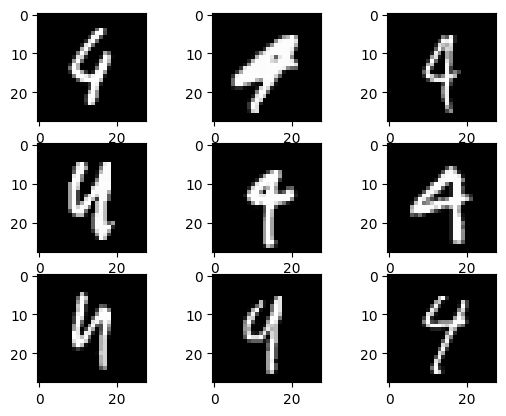

In [35]:
j=0
for i in ind[:9]:
    plt.subplot(3, 3, j+1)
    plt.axis
    image = X_test[i].reshape(-1, 28, 28)*256
    plt.imshow(image[0], cmap='gray')
    j += 1
plt.show()